<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

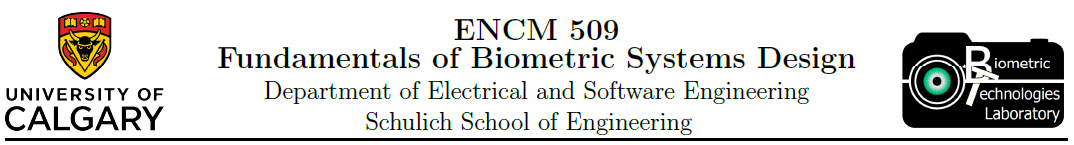

<center>
    <h1>Laboratory Experiment #6</h1>
    <h2>Face Recognition: Feature Extraction and Classification</h2>
</center>


* Team member - Abid Al Labib 
    - UCID: 30070079
* Team member - Madhu Selvaraj
    - UCID: 30061979
    

## Introduction:
In this lab we

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import exposure
import scipy.linalg as la

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from utils_cm import plot_confusion_matrix

import matplotlib as mpl
# setting the default colormap for images only
mpl.rc('image', cmap='gray')

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [3]:
# M could be large (for example, 16: 8 of yours and 8 of a friend)
# for At&T dataset there are 10 faces per subject. 
# However, we are going to load only the first 9
# the 10th image will be used to compare later on.
M = 9 #Number of images in training set

#image normalization
# can be any number that is close to the std and mean of most of the images.
um = 100
ustd = 80

Size of each image: (112, 92) 10304
Size of each image: (112, 92) 10304
Size of each image: (112, 92) 10304


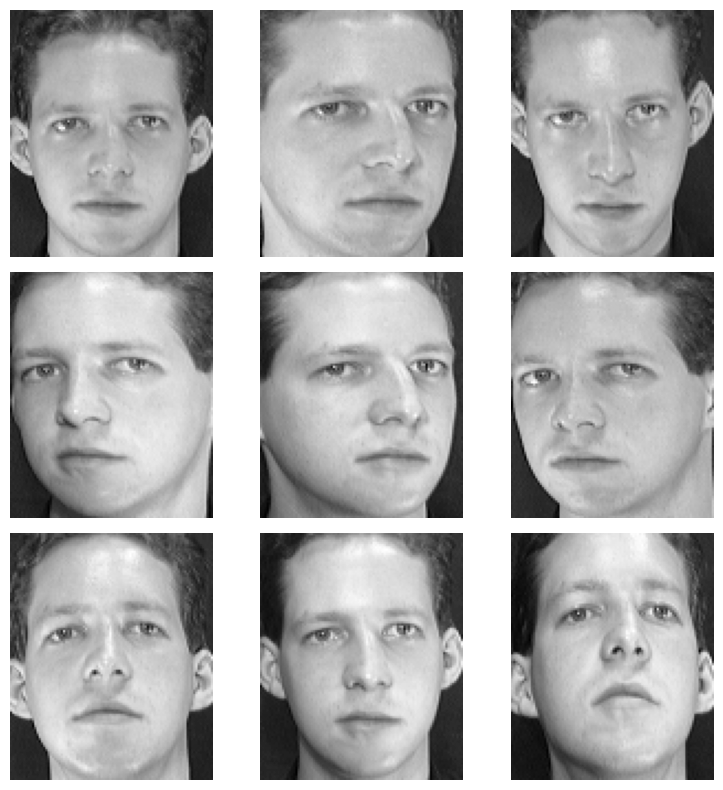

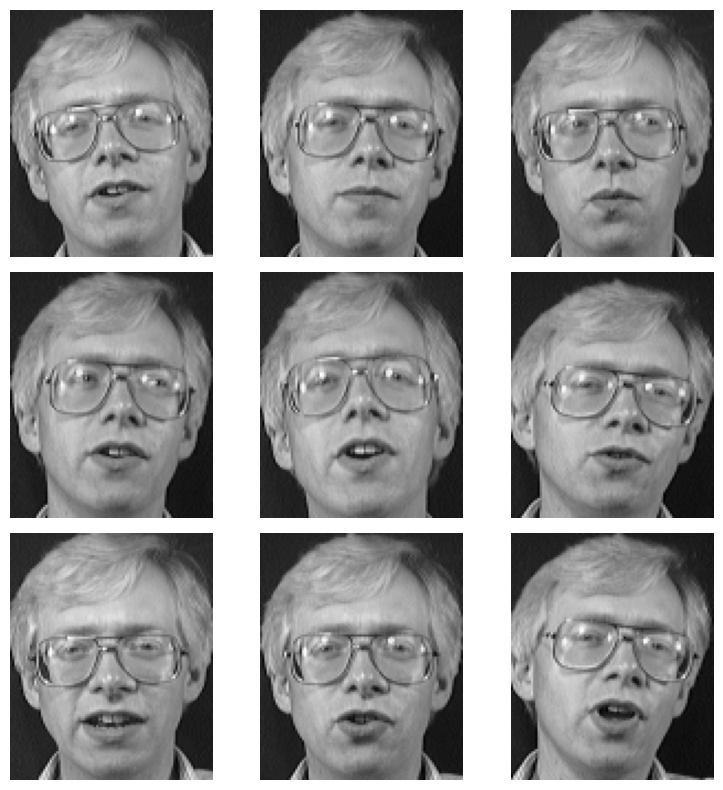

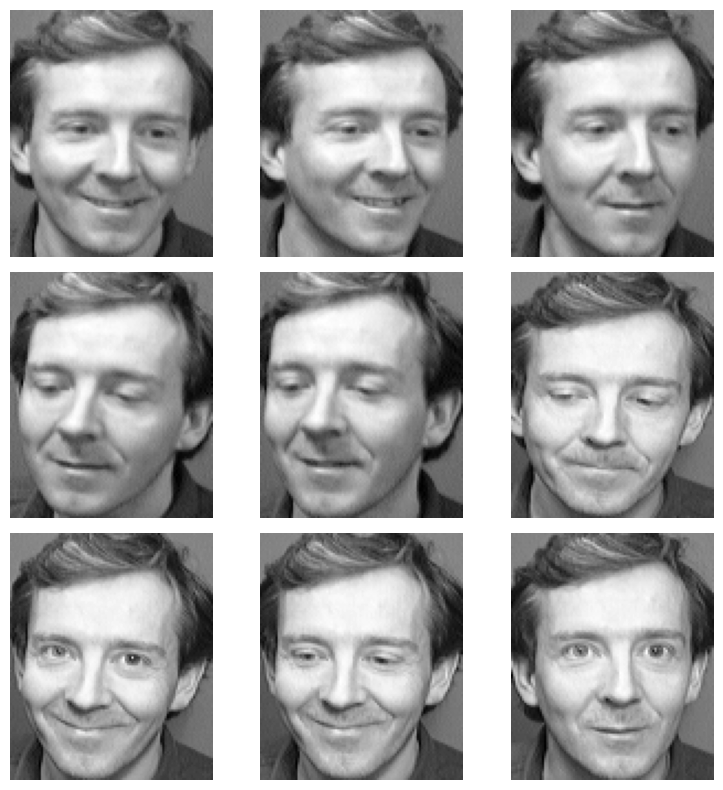

In [4]:
#loading the images
for i in range(1,4):
    path = f'ATT dataset/s{i}/'
    img = imread(path + '1.pgm', as_gray=True)

    # get the number of rows (irow) and columns (icol). 
    # these values must to be the same for all images
    irow, icol = img.shape

    # allocation of vector that will have all images
    S = np.zeros((irow*icol, M)) # img matrix

    plt.figure(figsize=(8,8))
    for i in range(1,M+1):
        img = imread(path + '{}.pgm'.format(i), as_gray=True)

        plt.subplot(3,3,i)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        # reshape(img',irow*icol,1); 
        # creates a (N1*N2)x1 vector
        temp = np.reshape(img, (irow*icol,1))
        S[:,i-1] = temp[:,0] 
    # after finishing the sequence, S is a N1*N2xM matrix 

    print('Size of each image:', img.shape, np.multiply(img.shape[0], img.shape[1]))

# looping over all the loaded images in S to normalize
for i in range(S.shape[1]):
    temp = S[:,i]
    m = np.mean(temp)
    st = np.std(temp)
    # calculation where are defined the new pixels intensities
    S[:,i] = (temp - m) * ustd / st + um

Size of each image: (112, 92) 10304
Size of each image: (112, 92) 10304
Size of each image: (112, 92) 10304


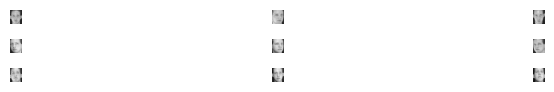

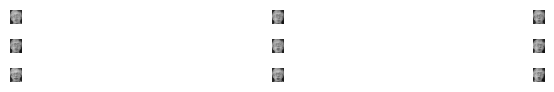

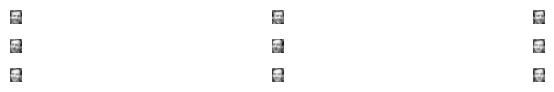

In [5]:
#storing all 27 faces into one gallery

S = np.zeros((irow*icol, M*3)) # img matrix

#loading the gallery images
for subject in range(1,4):
    path = f'ATT dataset/s{subject}/'
    img = imread(path + '1.pgm', as_gray=True)

    # get the number of rows (irow) and columns (icol). 
    # these values must to be the same for all images
    irow, icol = img.shape

    # allocation of vector that will have all images


    plt.figure(figsize=(8,8))
    for i in range(M,-1,-1):
        if i==0:
            i=i+1
        img = imread(path + '{}.pgm'.format(i), as_gray=True)

        plt.subplot(27,3,i)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        # reshape(img',irow*icol,1); 
        # creates a (N1*N2)x1 vector
        temp = np.reshape(img, (irow*icol,1))
        index = (subject*9) - i
        S[:,index] = temp[:,0] 
    # after finishing the sequence, S is a N1*N2xM matrix 

    print('Size of each image:', img.shape, np.multiply(img.shape[0], img.shape[1]))

# looping over all the loaded images in S to normalize
for i in range(S.shape[1]):
    temp = S[:,i]
    m = np.mean(temp)
    st = np.std(temp)
    # calculation where are defined the new pixels intensities
    S[:,i] = (temp - m) * ustd / st + um

##### viewing the normalized images

C:\Users\madhu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


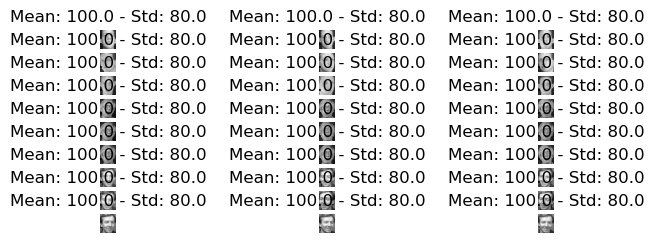

In [6]:
plt.figure(figsize=(8,8))
for i in range(27):
    img = np.reshape(S[:,i], (irow, icol))
    
    plt.subplot(27,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Mean: %.1f - Std: %.1f' % (np.mean(img), np.std(img)))

##### mean image

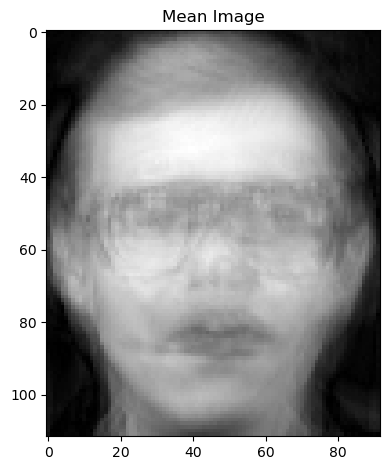

In [7]:
# calculates the mean of each row instead of each column
m = np.mean(S, axis=1)
# converts to unsigned 8-bit integer. Values range from 0 to 255
m = np.uint8(np.abs(m)).reshape(-1,1) 

img = np.reshape(m, (irow, icol))
plt.imshow(img, cmap='gray')
plt.title('Mean Image');

##### Creating covariance matrix  L

In [14]:
dbx = S.copy()
A = dbx.T
L = np.matmul(A, A.T)

# vv is the eigenvector for L
# dd is the eigenvalue for  L = dbx.T*dbx
dd, vv = la.eig(L)

##### Sort and eliminate zero eigenvalue

In [15]:
v = np.zeros(vv.shape)
d = np.zeros(dd.shape)

for i in range(vv.shape[1]):
    if (dd[i] > 1e-4):
        v[:,i] = vv[:,i]
        d[i] = dd[i]
        
# sort d in ascending order
index = np.argsort(d)
B = d[index]
ind = np.zeros(index.shape).astype(int)
dtemp = np.zeros(index.shape)
vtemp = np.zeros(v.shape)

idx_len = len(index)
for i in range(idx_len):
    dtemp[i] = B[idx_len-1-i]
    ind[i] = idx_len-1-index[i]
    vtemp[:,ind[i]] = v[:,i]

d = dtemp
v = vtemp

C:\Users\getab\AppData\Local\Temp\ipykernel_21816\184907035.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  d[i] = dd[i]


#### Normalization of eigenvectors

In [16]:
for i in range(v.shape[1]):
    kk = v[:,i]
    temp = np.sqrt(np.sum(np.power(kk,2)))
    v[:,i] = v[:,i] / temp
    
# Eigenvectors of C matrix
u = np.zeros(dbx.shape)
for i in range(v.shape[1]):
    temp = np.sqrt(d[i])
    u[:,i] = np.matmul(dbx, v[:,i]) / temp
    
for i in range(u.shape[1]):
    kk = u[:,i]
    temp = np.sqrt(np.sum(np.power(kk,2)))
    u[:,i] = u[:,i] / temp

#### Showing eigenfaces

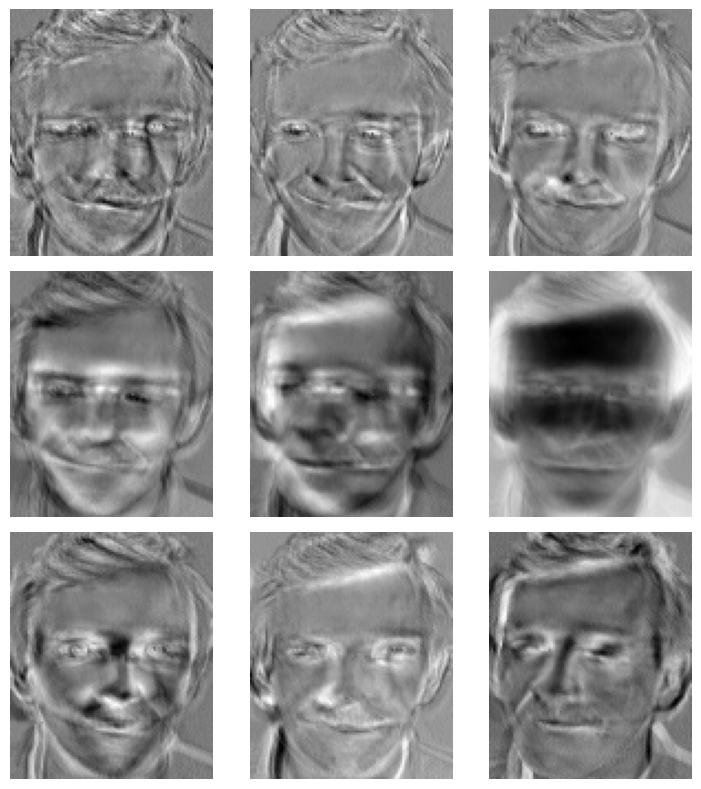

In [17]:
plt.figure(figsize=(8,8))
for i in range(M):
    img = np.reshape(u[:,i], (irow, icol))
    
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

#### Find the weight of each face in the training set

In [18]:
omega = np.zeros((M,M))
WW = np.zeros((M,1))

for h in range(dbx.shape[1]):
    for i in range(u.shape[1]):
        t = u[:,i].T
        WeightOfImage = np.dot(t, dbx[:,h].T)
        WW[i] = WeightOfImage
    omega[:,h] = WW[:,0]

### Probe images and matching

In [38]:
#probe images -> storing all together???
p = np.zeros((irow*icol, 6)) # img matrix
#loading the images
for i in range(1,6):
    path = f'ATT dataset/s{i}/'
    img = imread(path + '10.pgm', as_gray=True)

    # get the number of rows (irow) and columns (icol). 
    # these values must to be the same for all images
    irow, icol = img.shape

    # allocation of vector that will have all images
   

    plt.figure(figsize=(8,8))
    plt.subplot(3,3,i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # reshape(img',irow*icol,1); 
    # creates a (N1*N2)x1 vector
    temp = np.reshape(img, (irow*icol,1))
    p[:,i-1] = temp[:,0] 

    print('Size of each image:', img.shape, np.multiply(img.shape[0], img.shape[1]))

#non face images
img = imread('CalgaryTower.jpg', as_gray=True)    

irow, icol = img.shape

plt.figure(figsize=(8,8))
plt.subplot(3,3,i)
plt.imshow(img, cmap='gray')
plt.axis('off')

# reshape(img',irow*icol,1); 
# creates a (N1*N2)x1 vector
temp = np.reshape(img, (irow*icol,1))
p[:,5] = temp[:,0] 
print('Size of each image:', img.shape, np.multiply(img.shape[0], img.shape[1]))    

# looping over all the loaded images in p to normalize
for i in range(p.shape[1]):
    temp = p[:,i]
    m = np.mean(temp)
    st = np.std(temp)
    # calculation where are defined the new pixels intensities
    p[:,i] = (temp - m) * ustd / st + um

[91.08826145 90.94623585 90.82601595 88.30427804 84.84066087 87.31438776
 89.05388444 86.69796792 85.16663319]
